In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
#"Background only" i.e. no anomalies in this dataset
myfile = open("/data0/users/bpnachman/anomaly/processed_lhe001_background.txt")

#Want to make new particles with a given mass.  E = mc^2
#Instead electron + electron -> new particle -> stuff we sift through
#electron + electron -> photon + new particle -> stuff

mymeasuredenergy = []
for line in myfile:
    metadata = line.split("J")[0]
    eventinfo = line.split("J")[1]
    jets = eventinfo.split("P")[0]
    particles = eventinfo.split("P")[1]
    nparticles = int(len(particles.split())/5) #number of particles
    njets = int(len(jets.split())/11) #number of "jets"
    
    eventweight = float(metadata.split()[0]) #this is the event "weight".  Let's ignoreit for now (we will need it later).
    
    #True collision quantities
    truthcenterofmassenergy = float(metadata.split()[1]) #true total energy - should be delta function at 1000 GeV
    truthsqrtshat = float(metadata.split()[2]) #energy available for making new particles (electron energy - photon)
    truthphotonpT = float(metadata.split()[3]) #photon momentum |p| in units of GeV
    truthphotoneta = float(metadata.split()[4]) #photon pseudorapidity (~polar angle - see e.g. https://en.wikipedia.org/wiki/Pseudorapidity)
    truthphotonphi = float(metadata.split()[5]) #photon azimuthal angle

    #Measured collision quantities
    measuredcenterofmassenergy = float(metadata.split()[6]) #true measured energy - should be noisy version of truthcenterofmassenergy
    measuredsqrtshat = float(metadata.split()[7]) #energy available for making new particles (electron energy - photon)
    measuredphotonpT = float(metadata.split()[8]) #photon momentum |p| in units of GeV
    measuredphotoneta = float(metadata.split()[9]) #photon pseudorapidity (~polar angle - see e.g. https://en.wikipedia.org/wiki/Pseudorapidity)
    measuredphotonphi = float(metadata.split()[10]) #photon azimuthal angle
    
    mymeasuredenergy+=[measuredcenterofmassenergy]
    
    particles = particles.split()
    particles_vec = []
    for i in range(nparticles):
        particle = np.zeros(5)
        #order:
        # - index
        # - magnitude of momentum |p| (units of GeV)
        # - pseudorapidity (~polar angle - see e.g. https://en.wikipedia.org/wiki/Pseudorapidity)
        # - azimuthal angle
        # - particle identifier (https://pdg.lbl.gov/2006/reviews/pdf-files/montecarlo-web.pdf)
        particle = [particles[i*5],particles[i*5+1],particles[i*5+2],particles[i*5+3],particles[i*5+4]]
        particles_vec+=[particle]
        #print(particles[i*5],particles[i*5+1],particles[i*5+2],particles[i*5+3],particles[i*5+4])
        
    jets = jets.split()
    jets_vec = []
    for i in range(njets):
        jet = np.zeros(11)
        #order:
        # - index
        # - magnitude of momentum |p| (units of GeV)
        # - pseudorapidity (~polar angle - see e.g. https://en.wikipedia.org/wiki/Pseudorapidity)
        # - azimuthal angle
        # - mass (units of GeV/c^2)
        # - bit encoding of the jet "flavor" (not totally sure what the bit means, but will look it up)
        # - 0th angular moment of jet radiation
        # - 1th angular moment of jet radiation
        # - 2th angular moment of jet radiation
        # - 3th angular moment of jet radiation
        # - 4th angular moment of jet radiation
        jet = [jets[i*11],jets[i*11+1],jets[i*11+2],jets[i*11+3],jets[i*11+4],jets[i*11+5],jets[i*11+6],jets[i*11+7],jets[i*11+8],jets[i*11+9],jets[i*11+10]]
        jets_vec+=[jet]

Text(0, 0.5, 'Number of Events / bin')

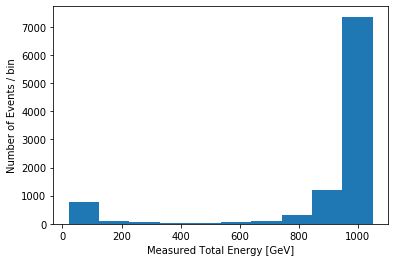

In [38]:
plt.hist(mymeasuredenergy)
plt.xlabel("Measured Total Energy [GeV]")
plt.ylabel("Number of Events / bin")

In [ ]:
#Later for ML: https://energyflow.network/examples/